# Intro to coffea.hist

A histogram in Coffea is a `N-D` collection of different categories, along with bin(s)

Let's start by importing some necessary libraries

In [1]:
from coffea import hist
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Let's first explore 1D coffea histograms

In [2]:
hist_1D = hist.Hist("Beverage items",
                    hist.Cat("soda", "different soda"),
                    hist.Bin("x","x coordinate [m]",20, -5,5),
                   )

Retrieving the histogram's bin contents using `values()`

In [3]:
hist_1D.values()

{}

Let's use `fill()` to add different kinds of soda, with random x values using `numpy.random`

In [4]:
hist_1D.fill(soda="cocacola",x=np.random.normal(size=10))

In [5]:
hist_1D.values()

{('cocacola',): array([0., 0., 0., 0., 0., 0., 1., 0., 0., 3., 3., 2., 1., 0., 0., 0., 0.,
        0., 0., 0.])}

Let's fill the hist with another soda item, again using `numpy.random`.. this time with a weight of 5 each.

In [6]:
hist_1D.fill(soda="pepsi",x=np.random.normal(size=10), weight=np.ones(10)*5)

In [7]:
hist_1D.values()

{('cocacola',): array([0., 0., 0., 0., 0., 0., 1., 0., 0., 3., 3., 2., 1., 0., 0., 0., 0.,
        0., 0., 0.]),
 ('pepsi',): array([ 0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  5.,  5.,  0., 15.,  5.,
        10.,  0.,  5.,  0.,  0.,  0.,  0.])}

Let's use `axes()` to explore the histogram 

In [8]:
hist_1D.axes()

(<Cat (name=soda) instance at 0x7fd50707c7f0>,
 <Bin (name=x) instance at 0x7fd50707c820>)

Let's use `integrate()`. Coffea hist documentation says `integrate()` --> Integrates current histogram along one dimension

In [9]:
print(hist_1D.integrate('soda'))

<Hist (x) instance at 0x7fd5070a1760>


In [10]:
print(hist_1D.integrate('soda').values())

{(): array([ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  5.,  8.,  3., 17.,  6.,
       10.,  0.,  5.,  0.,  0.,  0.,  0.])}


In [11]:
print(hist_1D.integrate('x'))

<Hist (soda) instance at 0x7fd5070a1e50>


In [12]:
print(hist_1D.integrate('x').values())

{('cocacola',): 10.0, ('pepsi',): 50.0}


Let's use matplotlib and coffea `plot1d` to draw a histogram

<AxesSubplot:xlabel='x coordinate [m]', ylabel='Beverage items'>

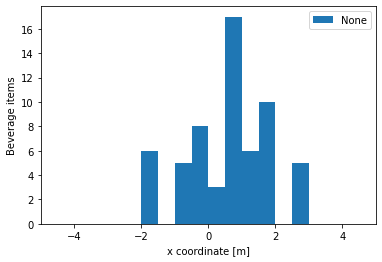

In [13]:
hist.plot1d(hist_1D.integrate('soda'),stack=True)

Let's move to 2D histograms. Simple example from the Coffea manual plus Brent's tutorial notebook from last year.

In [14]:
h = hist.Hist("Observed bird count",
               hist.Cat("species", "Bird species"),
               hist.Bin("x", "x coordinate [m]", 10, -5, 5),
               hist.Bin("y", "y coordinate [m]", 10, -5, 5),
             )

Now we'ss use `fill()` to add 10 `ducks`, with random `x-y` values using `numpy.random`, each with a weight of 3

In [15]:
h.fill(species='ducks', x=np.random.normal(size=10), y=np.random.normal(size=10), weight=np.ones(10) * 3)

Now I'll add another species

In [16]:
h.fill(species='phoenix', x=np.random.normal(size=8), y=np.random.normal(size=8), weight=np.ones(8)*9)

In [17]:
h.values()

{('ducks',): array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 0., 3., 0., 0., 0.],
        [0., 0., 3., 0., 3., 6., 0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 ('phoenix',): array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 27.,  9.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

Now let's use `integrate()` for 2d coffea histograms

In [18]:
h.integrate('species')

<Hist (x,y) instance at 0x7fd51266cd60>

In [19]:
h.integrate('species').values()

{(): array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12.,  3.,  0.,  3.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  0., 30., 15.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  3., 21.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])}

In [20]:
h.integrate('species','ducks').values()

{(): array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 0., 3., 0., 0., 0.],
        [0., 0., 3., 0., 3., 6., 0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 3., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])}

In [21]:
h.integrate('x')

<Hist (species,y) instance at 0x7fd5126835e0>

In [22]:
h.integrate('x').values()

{('ducks',): array([0., 0., 3., 6., 9., 9., 3., 0., 0., 0.]),
 ('phoenix',): array([ 0.,  0.,  0., 18., 27., 27.,  0.,  0.,  0.,  0.])}

In [23]:
h.integrate('y').values()

{('ducks',): array([ 0.,  0.,  0.,  9., 12.,  9.,  0.,  0.,  0.,  0.]),
 ('phoenix',): array([ 0.,  0.,  0.,  9., 36., 18.,  9.,  0.,  0.,  0.])}

In [24]:
h.integrate('species').integrate('x').values()

{(): array([ 0.,  0.,  3., 24., 36., 36.,  3.,  0.,  0.,  0.])}

Let's create a plot to draw everthing in using matplotlib and the `plot2d()` method in `coffea.hist`

<AxesSubplot:xlabel='x coordinate [m]', ylabel='y coordinate [m]'>

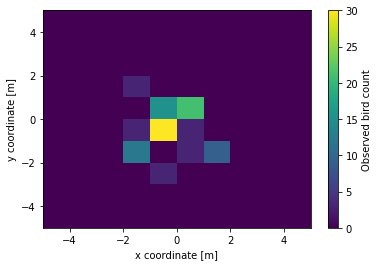

In [25]:
hist.plot2d(h.integrate('species'), xaxis='x')

Now we can play with the axes to learn some more<br>
We can view the axes with `h.axes()`

In [26]:
h.axes()

(<Cat (name=species) instance at 0x7fd5126f2a30>,
 <Bin (name=x) instance at 0x7fd5126f2520>,
 <Bin (name=y) instance at 0x7fd5126e5820>)

We can remove the `x`-axis by integrating it out with `integrate()`

In [27]:
h.integrate('x').integrate('species').values()

{(): array([ 0.,  0.,  3., 24., 36., 36.,  3.,  0.,  0.,  0.])}

And now we can make a `1D` plot, in this case of `species` and `y coordinate`

<AxesSubplot:xlabel='y coordinate [m]', ylabel='Observed bird count'>

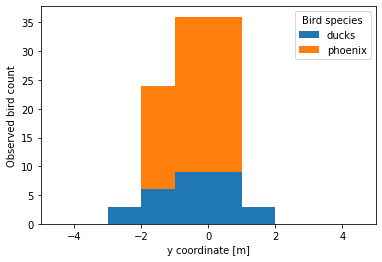

In [28]:
hist.plot1d(h.integrate('x'), stack=True) #stack makes a stack plot

## A more practical, physics example

In this example, I'll load a set of histograms from `histos/all2017mcsigsamples_skipSR_2022sept13_topcoffeatutorial.pkl.gz`<br>
This is a pickle file created by TopCoffea

First, let's import all the relevent packages (same as before, but here to make this section stand alone)

In [29]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Next, we'll open the pickle file, and load its histograms into a dictionary

In [30]:
#This only works in Jupyter notebooks. Run the wget command directly in the terminal otherwise
!mkdir -p ../histos/
!wget -nc https://www.crc.nd.edu/~abasnet/EFT/topcoffeaTutorial/all2017mcsigsamples_skipSR_2022sept13_topcoffeatutorial.pkl.gz -O ../histos/all2017mcsigsamples_skipSR_2022sept13_topcoffeatutorial.pkl.gz
fin = '../histos/all2017mcsigsamples_skipSR_2022sept13_topcoffeatutorial.pkl.gz'
hists = {} #dictionary of histograms
with gzip.open(fin) as fin:
  hin = pickle.load(fin)
  for k in hin.keys():
    if k in hists: hists[k]+=hin[k]
    else:               hists[k]=hin[k]
    print(hists[k])

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
File ‘../histos/all2017mcsigsamples_skipSR_2022sept13_topcoffeatutorial.pkl.gz’ already there; not retrieving.
<HistEFT (sample,channel,systematic,appl,invmass) instance at 0x7fd4fe99ec10>
<HistEFT (sample,channel,systematic,appl,ptbl) instance at 0x7fd4fe92d910>
<HistEFT (sample,channel,systematic,appl,ptz) instance at 0x7fd4fe93d400>
<HistEFT (sample,channel,systematic,appl,njets) instance at 0x7fd4fe93d6a0>
<HistEFT (sample,channel,systematic,appl,nbtagsl) instance at 0x7fd4fe94e0a0>
<HistEFT (sample,channel,systematic,appl,l0pt) instance at 0x7fd4fe94eb50>
<HistEFT (sample,channel,systematic,appl,l1pt) instance at 0x7fd51271fe20>
<HistEFT (sample,channel,systematic,appl,l1eta) instance at 0x7fd4fe964f10>
<HistEFT (sample,channel,systematic,appl,j0pt) instance at 0x7fd8dca85a00>
<HistEFT (s

Now we'll grab the histogram for `njets`

In [31]:
h = hists['njets'] #load histogram of njets distribution

Each histogram is a `N-D` collection of different categories

In [32]:
h.axes() #all axes in this version

(<Cat (name=sample) instance at 0x7fd4fe93d730>,
 <Cat (name=channel) instance at 0x7fd4fe93d9d0>,
 <Cat (name=systematic) instance at 0x7fd4fe93dc10>,
 <Cat (name=appl) instance at 0x7fd4fe93dcd0>,
 <Bin (name=njets) instance at 0x7fd4fe93df70>)

You can retrieve the histogram's bin contents with the `values()` method

In [33]:
h.values() #this is large, and Jupyter wants to show the whole thing
print(list(h.values())[0],'...') #just print the first entry

('ttlnuJet_privateUL17', '2lss_CRflip', 'nominal', 'isSR_2lSS') ...


Using `identifiers()`, you can list different categories inside an axis.

In [34]:
h.axis('appl').identifiers()


[<StringBin (isAR_2lOS) instance at 0x7fd4fe93dee0>,
 <StringBin (isAR_2lSS) instance at 0x7fd4fe93dd60>,
 <StringBin (isAR_3l) instance at 0x7fd4fe93de20>,
 <StringBin (isSR_2lOS) instance at 0x7fd4fe93de80>,
 <StringBin (isSR_2lSS) instance at 0x7fd4fe93dd00>,
 <StringBin (isSR_3l) instance at 0x7fd4fe93ddc0>]

In [35]:
h.axis('sample').identifiers()

[<StringBin (tHq_privateUL17) instance at 0x7fd4fe93d820>,
 <StringBin (tllq_privateUL17) instance at 0x7fd4fe93d7c0>,
 <StringBin (ttHJet_privateUL17) instance at 0x7fd4fe93d940>,
 <StringBin (ttllJet_privateUL17) instance at 0x7fd4fe93d8e0>,
 <StringBin (ttlnuJet_privateUL17) instance at 0x7fd4fe93d760>,
 <StringBin (tttt_privateUL17) instance at 0x7fd4fe93d880>]

In [36]:
h.axis('channel').identifiers()

[<StringBin (2los_CRZ) instance at 0x7fd4fe93db80>,
 <StringBin (2los_CRtt) instance at 0x7fd4fe93db20>,
 <StringBin (2lss_CR) instance at 0x7fd4fe93da60>,
 <StringBin (2lss_CRflip) instance at 0x7fd4fe93da00>,
 <StringBin (3l_CR) instance at 0x7fd4fe93dac0>]

To select a specific label in a category we must use `integrate()` (the other option is `sum()` which combines all the lables in a category together)

In [37]:
h = h.integrate('channel','2los_CRZ').integrate('systematic', 'nominal').integrate('appl','isSR_2lOS')

We've now integrated outeverything but the type of samples:

In [38]:
h.values()

{('ttlnuJet_privateUL17',): array([7.24126583e-06, 2.26134768e-05, 3.17111366e-05, 2.70135550e-05,
        1.44257054e-05, 5.66668970e-06, 1.84879711e-06, 3.96467104e-07,
        6.65797459e-08, 1.67598336e-10]),
 ('tllq_privateUL17',): array([2.14025890e-04, 7.49582242e-04, 1.13590226e-03, 9.16940973e-04,
        4.28478067e-04, 1.34037636e-04, 3.32682209e-05, 7.31934914e-06,
        1.39966348e-06, 2.58972332e-07]),
 ('tHq_privateUL17',): array([1.08561763e-06, 2.59711188e-06, 2.96098717e-06, 2.40996478e-06,
        1.19712222e-06, 4.28392928e-07, 1.25171365e-07, 1.12900365e-08,
        1.07765389e-09, 3.98886175e-11]),
 ('tttt_privateUL17',): array([0.00000000e+00, 5.27661633e-09, 2.55915149e-08, 9.10195887e-08,
        9.01770983e-08, 1.76872700e-07, 7.32886143e-08, 7.91338670e-08,
        9.90148937e-09, 5.05115578e-09]),
 ('ttllJet_privateUL17',): array([2.63031220e-05, 1.07781507e-04, 2.73189861e-04, 4.51997781e-04,
        4.84822839e-04, 3.45322809e-04, 1.82332792e-04, 6.88319

In [39]:
h.axes()

(<Cat (name=sample) instance at 0x7fd4fe93d730>,
 <Bin (name=njets) instance at 0x7fd4fe93df70>)

Let's create a plot to draw everthing in using matplotlib and the `plot1d()` method in `coffea.hist`

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

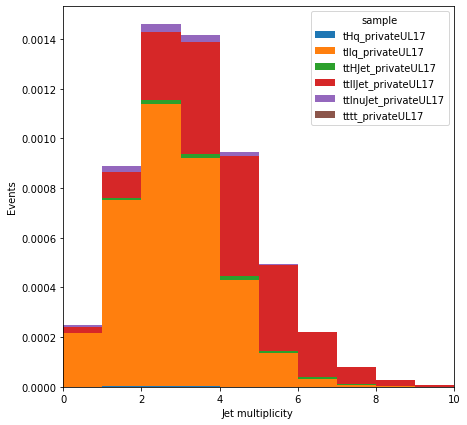

In [40]:
fig, ax = plt.subplots(1,1, figsize=(7,7)) #create an axis for plotting
hist.plot1d(h, stack=True)
#fig.show() #not needed in Jupyter, but this draws the figure in the terminal

# topcoffea.modules.HistEFT

I'll continue using the pkl file from above<br>
Now we'll use methods that are unique to HistEFT (e.g. `set_wilson_coefficients()` to scale the Wilson Coefficient (WC) values)

The `HistEFT` class holds the structure constants ($S_0, S_{1j}, S_{2j},$ and $S_{3jk}$) we solved for when partins the EFT files, <br>
so the event yields are just a function of the WCs ($\vec{c}$):

\begin{equation}
N\left(\dfrac{\vec{c}}{\Lambda^2}\right) = S_0 + \sum_j S_{1j} \frac{c_j}{\Lambda^2} + \sum_j S_{2j} \frac{c_j^2}{\Lambda^4} + \sum_{j,k} S_{3jk} \frac{c_j}{\Lambda^2} \frac{c_k}{\Lambda^2}
\end{equation}

In [41]:
h._nwc

26

where `_nwc` is a local variable inside a HistEFT that stores how many WCs it contains<br>

In [42]:
h._wcnames

['cpt',
 'ctp',
 'cptb',
 'cQlMi',
 'cQq81',
 'cQq11',
 'cQl3i',
 'ctq8',
 'ctlTi',
 'ctq1',
 'ctli',
 'cQq13',
 'cbW',
 'cpQM',
 'cpQ3',
 'ctei',
 'cQei',
 'ctW',
 'ctlSi',
 'cQq83',
 'ctZ',
 'ctG',
 'ctt1',
 'cQt1',
 'cQt8',
 'cQQ1']

First, we'll scale the histogram to the SM (all `WCs=0`)

In [43]:
h.set_sm()

The WCs are used whenever `values()` method is called

In [44]:
h.values()

{('ttlnuJet_privateUL17',): array([7.24126583e-06, 2.26134768e-05, 3.17111366e-05, 2.70135550e-05,
        1.44257054e-05, 5.66668970e-06, 1.84879711e-06, 3.96467104e-07,
        6.65797459e-08, 1.67598336e-10]),
 ('tllq_privateUL17',): array([2.14025890e-04, 7.49582242e-04, 1.13590226e-03, 9.16940973e-04,
        4.28478067e-04, 1.34037636e-04, 3.32682209e-05, 7.31934914e-06,
        1.39966348e-06, 2.58972332e-07]),
 ('tHq_privateUL17',): array([1.08561763e-06, 2.59711188e-06, 2.96098717e-06, 2.40996478e-06,
        1.19712222e-06, 4.28392928e-07, 1.25171365e-07, 1.12900365e-08,
        1.07765389e-09, 3.98886175e-11]),
 ('tttt_privateUL17',): array([0.00000000e+00, 5.27661633e-09, 2.55915149e-08, 9.10195887e-08,
        9.01770983e-08, 1.76872700e-07, 7.32886143e-08, 7.91338670e-08,
        9.90148937e-09, 5.05115578e-09]),
 ('ttllJet_privateUL17',): array([2.63031220e-05, 1.07781507e-04, 2.73189861e-04, 4.51997781e-04,
        4.84822839e-04, 3.45322809e-04, 1.82332792e-04, 6.88319

In [45]:
h.values(overflow='allnan')

{('ttlnuJet_privateUL17',): array([0.00000000e+00, 7.24126583e-06, 2.26134768e-05, 3.17111366e-05,
        2.70135550e-05, 1.44257054e-05, 5.66668970e-06, 1.84879711e-06,
        3.96467104e-07, 6.65797459e-08, 1.67598336e-10, 3.18056996e-08,
        0.00000000e+00]),
 ('tllq_privateUL17',): array([0.00000000e+00, 2.14025890e-04, 7.49582242e-04, 1.13590226e-03,
        9.16940973e-04, 4.28478067e-04, 1.34037636e-04, 3.32682209e-05,
        7.31934914e-06, 1.39966348e-06, 2.58972332e-07, 3.01484051e-08,
        0.00000000e+00]),
 ('tHq_privateUL17',): array([0.00000000e+00, 1.08561763e-06, 2.59711188e-06, 2.96098717e-06,
        2.40996478e-06, 1.19712222e-06, 4.28392928e-07, 1.25171365e-07,
        1.12900365e-08, 1.07765389e-09, 3.98886175e-11, 0.00000000e+00,
        0.00000000e+00]),
 ('tttt_privateUL17',): array([0.00000000e+00, 0.00000000e+00, 5.27661633e-09, 2.55915149e-08,
        9.10195887e-08, 9.01770983e-08, 1.76872700e-07, 7.32886143e-08,
        7.91338670e-08, 9.90148937e

Plotting this should look the same as before, since by default the WCs are 0

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

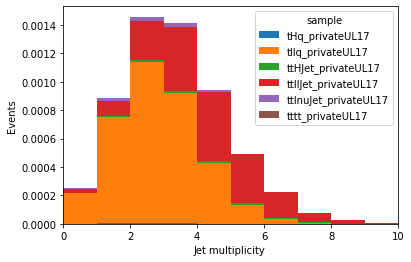

In [46]:
hist.plot1d(h, stack=True)

Now let's set some of the WCs to 1 to see that things change

In [47]:
h.set_wilson_coefficients(cpQM=1, ctW=1, ctG=1)

In [48]:
h.values()

{('ttlnuJet_privateUL17',): array([9.32804642e-06, 2.99073168e-05, 4.21980369e-05, 3.65192883e-05,
        1.98799675e-05, 8.18453865e-06, 2.74014639e-06, 5.85606011e-07,
        1.14386277e-07, 2.04792817e-10]),
 ('tllq_privateUL17',): array([2.36280620e-04, 8.30433648e-04, 1.28543981e-03, 1.05713359e-03,
        5.08753212e-04, 1.66565361e-04, 4.44624007e-05, 1.03813232e-05,
        1.99218863e-06, 3.68227492e-07]),
 ('tHq_privateUL17',): array([1.50595062e-06, 4.07397278e-06, 6.75194766e-06, 5.68913246e-06,
        3.74377589e-06, 1.21915231e-06, 3.49411101e-07, 1.97530494e-07,
        3.18250754e-08, 1.61851674e-09]),
 ('tttt_privateUL17',): array([0.00000000e+00, 7.69953367e-09, 4.01293731e-08, 1.50746221e-07,
        1.78414335e-07, 2.98638955e-07, 1.22991633e-07, 1.28636022e-07,
        1.79683004e-08, 9.22818653e-09]),
 ('ttllJet_privateUL17',): array([3.53712043e-05, 1.46960257e-04, 3.81308277e-04, 6.65156940e-04,
        7.46145033e-04, 5.73133568e-04, 3.18408238e-04, 1.28537

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

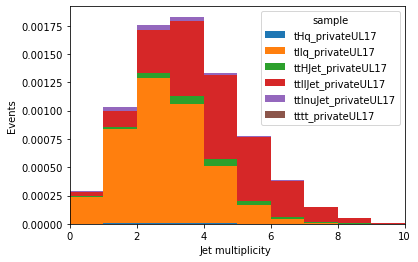

In [49]:
hist.plot1d(h, stack=True)

There's one last thing we must due in order to produce the predicted event yields.<br>
The EFT samples come normalized to $\sigma * w_{\mathrm{gen}}$<br>
In order to produce event yields, we must scale them by $\frac{\mathcal{L}}{\sum{w_{\mathrm{event}}^{\mathrm{SM}}}}$ , where $\sum{w_{\mathrm{event}}^{\mathrm{SM}}}$ is the sum of the event weights, evaluated at the SM. When we run the topcoffea processor to make our pkl file, this scaling with $\sum{w_{\mathrm{event}}^{\mathrm{SM}}}$ is already done. We just need to scale by lumi. 

In [50]:
h.set_sm()    #set WCs to be SM values to be safe
wgt = 1000*41.48 #multiply 1000 for units 
print('Scaling by', wgt)
h.scale(wgt) #2017 lumi of 41.48 fb^-1

Scaling by 41480.0


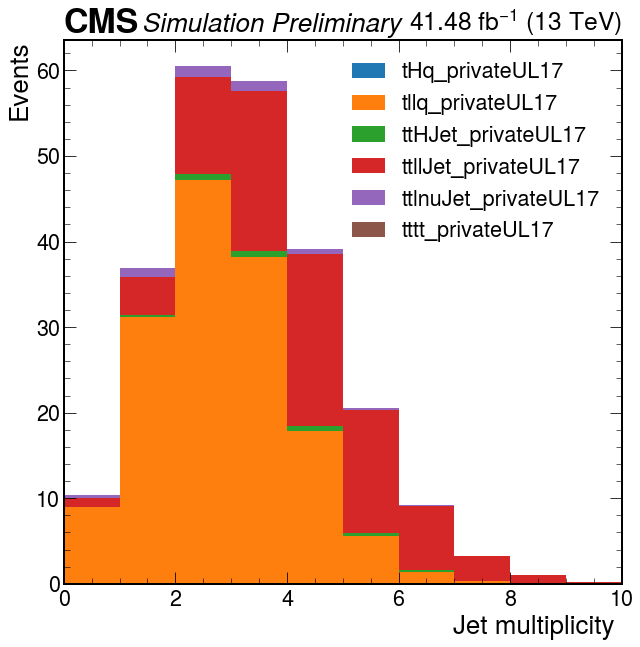

In [51]:
import mplhep as hep
hep.style.use("CMS")

fig, ax = plt.subplots(1,1) #create an axis for plotting
hist.plot1d(h, ax=ax, stack=True)
ax.legend()

# add some labels
lumi = hep.cms.label(ax=ax, lumi='41.48', label="Preliminary")